# Imports

In [310]:
# import necessary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Read dataset

- dnn_bar_pass_prediction: The LSAT prediction from the DNN model.
- gender: Gender of the student.
- lsat: LSAT score received by the student.
- race: Race of the student.
- ugpa: A student's undergraduate GPA.
- pass_bar: - Ground truth label indicating whether the student eventually passed a bar.
- bar_passed - I added a boolean target column for convenience, of whether someone passed the bar at any point
- tier: tier of law school the student went to (higher is better)
- fam_inc: family income (broken up into quintiles)
- grad: whether someone graduated from or dropped out of law school
- fulltime: indicates students who attend law school full time

In [311]:
df = pd.read_csv('bar_pass_prediction.csv')
df

,decile1b,decile3,ID,decile1,sex,race,cluster,lsat,ugpa,zfygpa,...,hisp,pass_bar,bar,bar_passed,tier,index6040,indxgrp,indxgrp2,dnn_bar_pass_prediction,gpa
0,10.0,10.0,2,10.0,1.0,7.0,1.0,44.0,3.5,1.33,...,0,1,a Passed 1st time,True,4.0,886.842082,g 700+,i 820+,0.979804,3.5
1,5.0,4.0,3,5.0,1.0,7.0,2.0,29.0,3.5,-0.11,...,0,1,a Passed 1st time,True,2.0,649.999987,f 640-700,f 640-700,0.979804,3.5
2,3.0,2.0,36,3.0,2.0,7.0,3.0,36.0,3.5,-0.64,...,0,1,a Passed 1st time,True,3.0,760.526298,g 700+,h 760-820,0.979804,3.5
3,7.0,4.0,52,7.0,2.0,7.0,3.0,39.0,3.5,0.34,...,0,1,a Passed 1st time,True,3.0,807.894717,g 700+,h 760-820,0.979804,3.5
4,9.0,8.0,55,9.0,2.0,7.0,4.0,48.0,3.5,1.02,...,0,1,a Passed 1st time,True,5.0,949.999974,g 700+,i 820+,0.979804,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22402,3.0,1.0,10695,3.0,2.0,3.0,6.0,26.5,1.8,-0.58,...,0,0,c Failed,False,1.0,440.526304,b 400-460,b 400-460,0.557568,1.8
22403,2.0,1.0,19642,3.0,2.0,3.0,6.0,19.7,1.8,-0.64,...,0,0,c Failed,False,1.0,333.157888,a under 400,a under 400,0.557568,1.8
22404,7.0,8.0,24704,7.0,2.0,3.0,3.0,36.0,1.8,0.41,...,0,1,a Passed 1st time,True,3.0,590.526298,e 580-640,e 580-640,0.557568,1.8
22405,10.0,10.0,10000,10.0,2.0,7.0,3.0,44.0,1.5,1.88,...,0,1,a Passed 1st time,True,3.0,686.842082,f 640-700,f 640-700,0.759128,1.5


# Data exploration

In [312]:
idsUnique = df['ID'].nunique()
idsTotal = df.shape[0]
numOfDuplicateIDs = idsTotal - idsUnique

print('Number of duplicate IDs:', numOfDuplicateIDs)

Number of duplicate IDs: 0


In [313]:
df.isnull().sum()

decile1b                   1604
decile3                    1604
ID                            0
decile1                    1092
sex                           5
race                         16
cluster                      96
lsat                          0
ugpa                          0
zfygpa                      984
DOB_yr                       50
grad                          3
zgpa                       1289
bar1                          0
bar1_yr                      39
bar2                          0
bar2_yr                      40
fulltime                     34
fam_inc                     289
age                          89
gender                        5
parttime                     34
male                          5
race1                        16
race2                        16
Dropout                       0
other                         0
asian                         0
black                         0
hisp                          0
pass_bar                      0
bar     

## Bar

In [314]:
df['bar'].unique()

array(['a Passed 1st time', 'c Failed', 'b Passed 2nd time', 'e non-Grad'],
      dtype=object)

# Gender

In [315]:
df['gender'].value_counts()

male      12576
female     9826
Name: gender, dtype: int64

In [316]:
df['gender'].isnull().sum()

5

In [317]:
df['lsat'].describe()

count    22407.000000
mean        36.767907
std          5.463248
min         11.000000
25%         33.000000
50%         37.000000
75%         41.000000
max         48.000000
Name: lsat, dtype: float64

## Race

In [318]:
df_race = df[['race', 'race1','race2', 'other', 'asian', 'black', 'hisp']]
df_race.head()

,race,race1,race2,other,asian,black,hisp
0,7.0,white,b white,0,0,0,0
1,7.0,white,b white,0,0,0,0
2,7.0,white,b white,0,0,0,0
3,7.0,white,b white,0,0,0,0
4,7.0,white,b white,0,0,0,0


In [319]:
df_race.isnull().sum()

race     16
race1    16
race2    16
other     0
asian     0
black     0
hisp      0
dtype: int64

In [320]:
df_race[df_race['race'].isnull() & df_race['race1'].isnull() & df_race['race2'].isnull()].shape[0]

16

It looks like the missing data in race, race1 and race2 are the exact same 16 people who have missing values. I think these columns are duplicating one another.

In [321]:
df_race['race'].unique()

array([ 7.,  4.,  2.,  3.,  6., nan,  8.,  1.,  5.])

In [322]:
df_race['race1'].unique()

array(['white', 'hisp', 'asian', 'black', nan, 'other'], dtype=object)

In [323]:
df_race['race2'].unique()

array(['b white', 'c other', 'a black', nan], dtype=object)

# GPA

In [324]:
df_gpa = df[['ugpa', 'gpa', 'zgpa', 'zfygpa','pass_bar']]
df_gpa.describe()

,ugpa,gpa,zgpa,zfygpa,pass_bar
count,22407.000000,22407.000000,21118.000000,21423.000000,22407.000000
mean,3.215451,3.215451,0.008756,0.086068,0.947829
std,0.404073,0.404073,0.980993,0.928683,0.222377
min,1.500000,1.500000,-6.440000,-3.350000,0.000000
25%,3.000000,3.000000,-0.680000,-0.560000,1.000000
50%,3.200000,3.200000,0.000000,0.080000,1.000000
75%,3.500000,3.500000,0.680000,0.740000,1.000000
max,3.900000,3.900000,3.450000,3.250000,1.000000


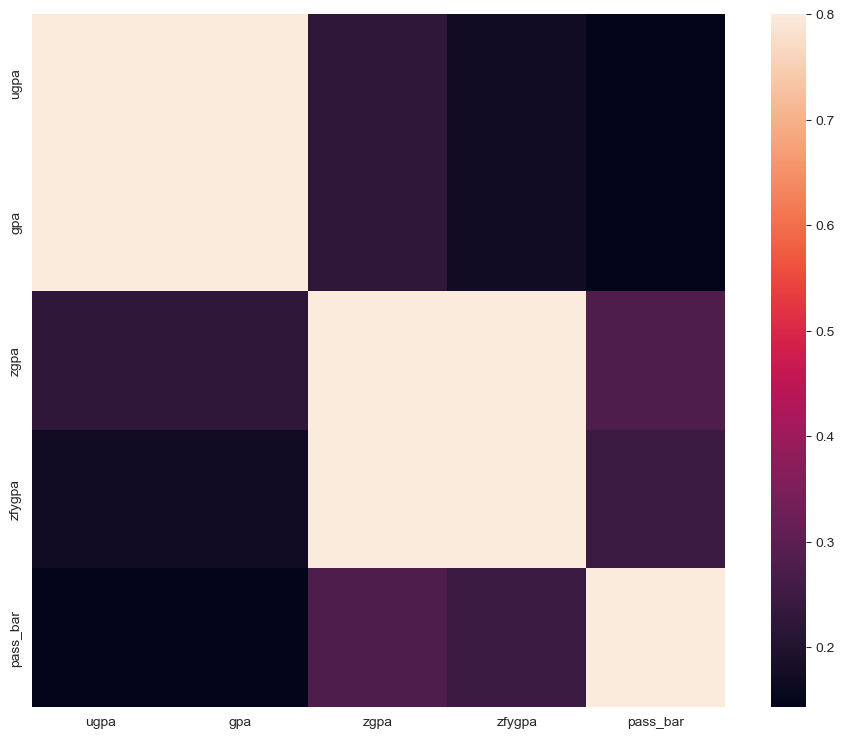

In [325]:
corrmat = df_gpa.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [326]:
df_gpa.isnull().sum()

ugpa           0
gpa            0
zgpa        1289
zfygpa       984
pass_bar       0
dtype: int64

In [327]:
df[df['ugpa'] != df['gpa']].shape[0]

0

## Other

In [328]:
corrmat = df.corr().abs()

upper = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['decile1', 'zfygpa', 'zgpa', 'parttime', 'male', 'bar_passed', 'gpa']

In [329]:
corrmat['zgpa'].sort_values(ascending = False)[:5]

zgpa        1.000000
decile3     0.974841
zfygpa      0.871557
decile1b    0.856430
decile1     0.856299
Name: zgpa, dtype: float64

In [330]:
corrmat['zfygpa'].sort_values(ascending = False)[:5]

zfygpa      1.000000
decile1     0.974492
decile1b    0.972201
zgpa        0.871557
decile3     0.852783
Name: zfygpa, dtype: float64

zgpa corresponds to decile3 and zfygpa corresponds to decile1 and decile1b. Deciles can be a way for law schools to report class rankings, so zgpa and zfygpa are law school gpa. There are multiple deciles, so I'm guessing decile3 is year 3 gpa. Let's look at these variables next.

## Deciles, zgpa and zfygpa

In [331]:
df_dec = df[['decile1b', 'decile1', 'zfygpa', 'decile3', 'zgpa']]
df_dec.head()

,decile1b,decile1,zfygpa,decile3,zgpa
0,10.0,10.0,1.33,10.0,1.88
1,5.0,5.0,-0.11,4.0,-0.57
2,3.0,3.0,-0.64,2.0,-1.12
3,7.0,7.0,0.34,4.0,-0.49
4,9.0,9.0,1.02,8.0,0.76


In [332]:
df_dec.describe()

,decile1b,decile1,zfygpa,decile3,zgpa
count,20803.000000,21315.000000,21423.000000,20803.000000,21118.000000
mean,5.528481,5.708234,0.086068,5.525934,0.008756
std,2.854800,2.783098,0.928683,2.851286,0.980993
min,1.000000,1.000000,-3.350000,1.000000,-6.440000
25%,3.000000,3.000000,-0.560000,3.000000,-0.680000
50%,6.000000,6.000000,0.080000,6.000000,0.000000
75%,8.000000,8.000000,0.740000,8.000000,0.680000
max,10.000000,10.000000,3.250000,10.000000,3.450000


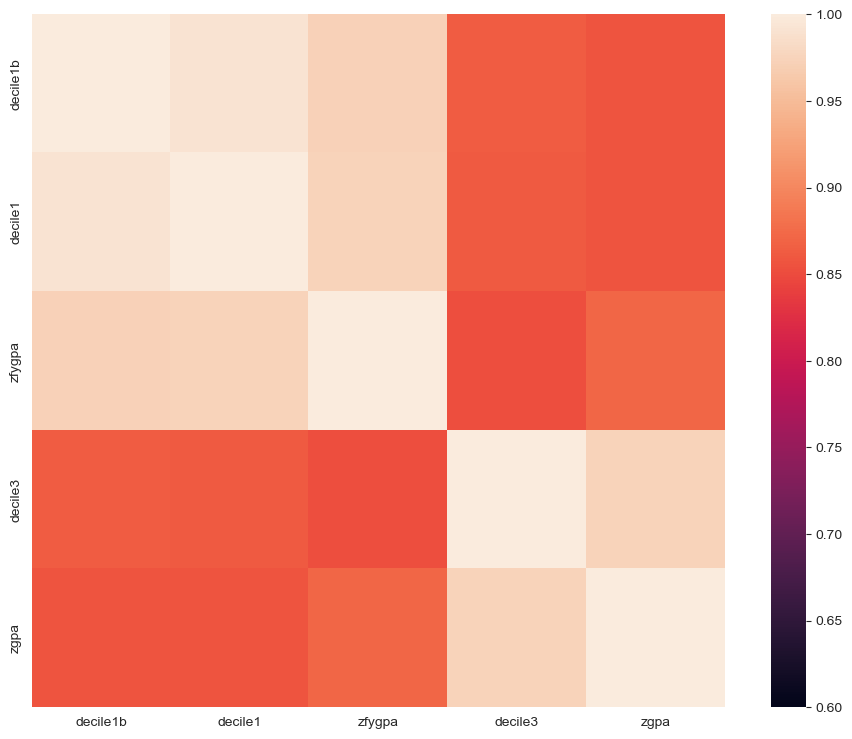

In [333]:
corrmat = df_dec.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, vmin=.6, square=True);

In [334]:
df_dec.isnull().sum()

decile1b    1604
decile1     1092
zfygpa       984
decile3     1604
zgpa        1289
dtype: int64

It looks like were getting above 95% correlation within these groups. The data in the decile columns seems more intuitive to me, so I'm just going to keep deciles 1 and 3.

Looking at the isnull data we see a fair amount of missing values in these columns, so maybe I'll be able to fill in some missing values in decile 3 and 1 from the data in decile1b, zgpa and zfygpa

In [335]:
df[df['decile1'].isnull()&~df['decile1b'].isnull()].shape[0]

0

# Data preprocessing

In [336]:
# What I'm doing next is filling in the missing decile values with information from the zfygpa column. I'll do that by creating a list of the minimum zfygpa values that scored in a certain decile and then filling the missing values with the decile score that scored above that minima.
df_zfy = df[['zfygpa', 'decile1']]
condlist = []

for i in range(1,11):
    condlist.append(df_zfy[df_zfy['decile1'] == i]['zfygpa'].min())

df['decile1'] = df.apply(lambda row: 9 if np.isnan(row['decile1']) & (row['zfygpa'] > .81) else row['decile1'], axis = 1)
df['decile1'] = df.apply(lambda row: 8 if np.isnan(row['decile1']) & (row['zfygpa'] > .51) else row['decile1'], axis = 1)
df['decile1'] = df.apply(lambda row: 7 if np.isnan(row['decile1']) & (row['zfygpa'] > .2) else row['decile1'], axis = 1)
df['decile1'] = df.apply(lambda row: 6 if np.isnan(row['decile1']) & (row['zfygpa'] > -.02) else row['decile1'], axis = 1)
df['decile1'] = df.apply(lambda row: 5 if np.isnan(row['decile1']) & (row['zfygpa'] > -.3) else row['decile1'], axis = 1)
df['decile1'] = df.apply(lambda row: 4 if np.isnan(row['decile1']) & (row['zfygpa'] > -.58) else row['decile1'], axis = 1)
df['decile1'] = df.apply(lambda row: 3 if np.isnan(row['decile1']) & (row['zfygpa'] > -.89) else row['decile1'], axis = 1)
df['decile1'] = df.apply(lambda row: 2 if np.isnan(row['decile1']) & (row['zfygpa'] > -1.3) else row['decile1'], axis = 1)
df['decile1'] = df.apply(lambda row: 1 if np.isnan(row['decile1']) & (row['zfygpa'] > -3.35) else row['decile1'], axis = 1)

In [337]:
# Same as above but for decile3 and zgpa
df_z = df[['zgpa', 'decile3']]
condlist = []

for i in range(1,11):
    condlist.append(df_z[df_z['decile3'] == i]['zgpa'].min())

df['decile3'] = df.apply(lambda row: 10 if np.isnan(row['decile3']) & (row['zgpa'] > 1.24) else row['decile3'], axis = 1)
df['decile3'] = df.apply(lambda row: 9 if np.isnan(row['decile3']) & (row['zgpa'] > .83) else row['decile3'], axis = 1)
df['decile3'] = df.apply(lambda row: 8 if np.isnan(row['decile3']) & (row['zgpa'] > .5) else row['decile3'], axis = 1)
df['decile3'] = df.apply(lambda row: 7 if np.isnan(row['decile3']) & (row['zgpa'] > .21) else row['decile3'], axis = 1)
df['decile3'] = df.apply(lambda row: 6 if np.isnan(row['decile3']) & (row['zgpa'] > -.05) else row['decile3'], axis = 1)
df['decile3'] = df.apply(lambda row: 5 if np.isnan(row['decile3']) & (row['zgpa'] > -.33) else row['decile3'], axis = 1)
df['decile3'] = df.apply(lambda row: 4 if np.isnan(row['decile3']) & (row['zgpa'] > -.6) else row['decile3'], axis = 1)
df['decile3'] = df.apply(lambda row: 3 if np.isnan(row['decile3']) & (row['zgpa'] > -.91) else row['decile3'], axis = 1)
df['decile3'] = df.apply(lambda row: 2 if np.isnan(row['decile3']) & (row['zgpa'] > -1.34) else row['decile3'], axis = 1)
df['decile3'] = df.apply(lambda row: 1 if np.isnan(row['decile3']) & (row['zgpa'] > -6.44) else row['decile3'], axis = 1)

In [338]:
# Fill missing gender data with male as the majority of the data is male
df['gender'].fillna('male', inplace=True)
df['gender'].replace('male', 1, inplace=True)
df['gender'].replace('female', 0, inplace=True)

# Fill missing race data with white as the majority of the data is white
# Use race1 as race column as this is the best representation
df['race1'].fillna('white', inplace=True)

df['tier'].fillna(3.0, inplace=True)
df['fam_inc'].fillna(4.0, inplace=True)

# Fill with column mean
df['decile3'].fillna(5, inplace=True)
df['decile1'].fillna(5, inplace = True)

df['grad'] = df['grad'].replace(['Y', 'X', 'O'], [1, 0, 0])
df = df.drop('Dropout', axis=1)

df['grad'] = df['grad'].fillna(1)
df['fulltime'].fillna(1.0, inplace=True)
df['fulltime'] = df['fulltime'].replace(2, 0)

In [ ]:
df['indxgrp'].replace({'g 700+': 7, 'f 640-700': 6, 'e 580-640': 5, 'd 520-580': 4, 'c 460-520': 3, 'b 400-460': 2, 'a under 400': 1}, inplace=True)
df['indxgrp2'].replace({'i 820+': 9, 'f 640-700': 6, 'h 760-820': 8, 'g 700-760': 7, 'e 580-640': 5, 'd 520-580': 4, 'c 460-520': 3, 'b 400-460': 2, 'a under 400': 1}, inplace=True)

In [339]:
# Drop ID column as this has no value for a model
# ugpa and gpa are identical and neither have missing values. Drop gpa.
# male and bar_passed are dupes of pass_bar and gender and parttime is the opposite of fulltime, so drop them (male, bar_passed and parttime).
# sex is pretty much the same as gender. Drop it!
# It looks like there are no values missing in decile1 that are present in decile1b, so I'm dropping decile1b
# Drop DOB_yr, cluster, index6040 and age as they have little to no correlation with pass_bar
# bar1, bar1_yr, bar2, bar2_yr and bar are either duplicates of pass_bar or give info on when a student passed the bar, so they wouldn't have predictive value. I'm dropping them.
df.drop(columns=['race', 'race2', 'other', 'asian', 'black', 'hisp', 'ID', 'gpa', 'parttime', 'male', 'bar_passed', 'sex', 'decile1b', 'zfygpa', 'zgpa', 'DOB_yr','age', 'cluster', 'bar1', 'bar1_yr', 'bar2', 'bar2_yr', 'bar', 'index6040', 'dnn_bar_pass_prediction'], axis=1, inplace=True)

In [340]:
df[['decile3', 'decile1', 'lsat', 'grad', 'fulltime', 'fam_inc', 'tier']] = df[['decile3', 'decile1', 'lsat', 'grad', 'fulltime', 'fam_inc', 'tier']].astype(int)

In [344]:
df = pd.get_dummies(df, columns=['race1'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22407 entries, 0 to 22406
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   decile3      22407 non-null  int32  
 1   decile1      22407 non-null  int32  
 2   lsat         22407 non-null  int32  
 3   ugpa         22407 non-null  float64
 4   grad         22407 non-null  int32  
 5   fulltime     22407 non-null  int32  
 6   fam_inc      22407 non-null  int32  
 7   gender       22407 non-null  int64  
 8   pass_bar     22407 non-null  int64  
 9   tier         22407 non-null  int32  
 10  indxgrp      22407 non-null  object 
 11  indxgrp2     22407 non-null  object 
 12  race1_asian  22407 non-null  uint8  
 13  race1_black  22407 non-null  uint8  
 14  race1_hisp   22407 non-null  uint8  
 15  race1_other  22407 non-null  uint8  
 16  race1_white  22407 non-null  uint8  
dtypes: float64(1), int32(7), int64(2), object(2), uint8(5)
memory usage: 1.6+ MB


<AxesSubplot:>

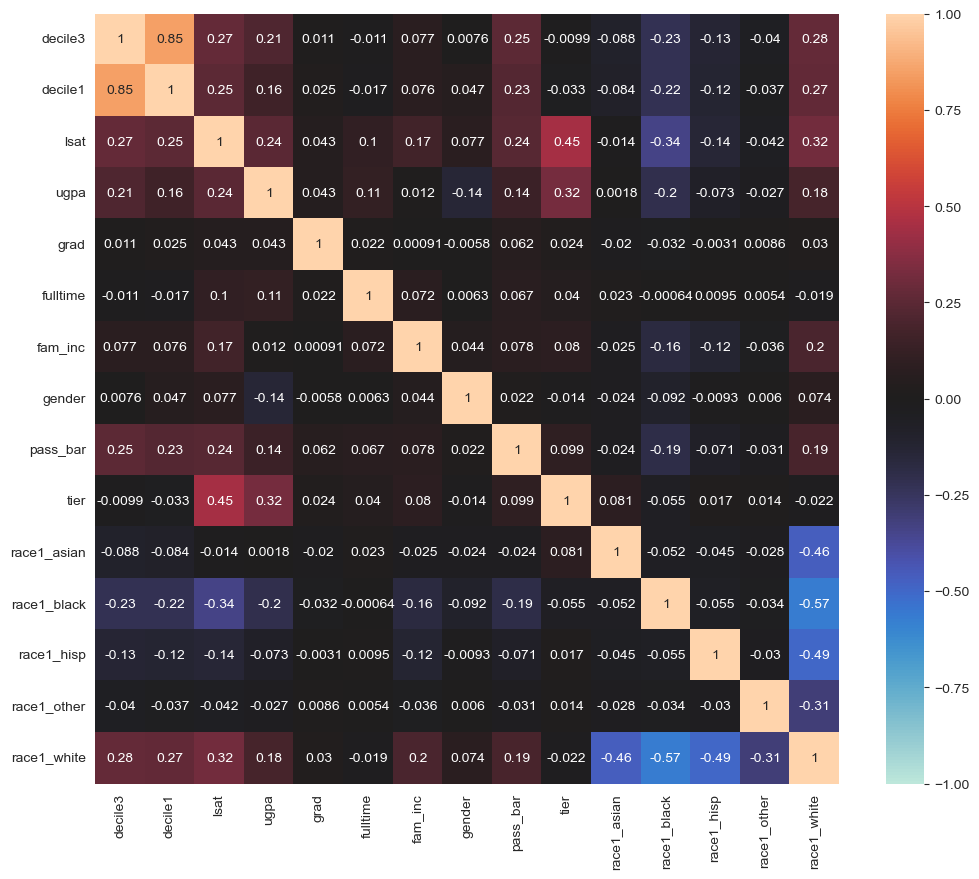

In [342]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)